# Building a Sequential Model for Time Series Forecasting

1. Generate a sine wave time series dataset
2. Create sequential train/test set
3. Build a Sequential Model

In [12]:


import numpy as np
import matplotlib.pyplot as plt

import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

## Generate a sine wave time series dataset

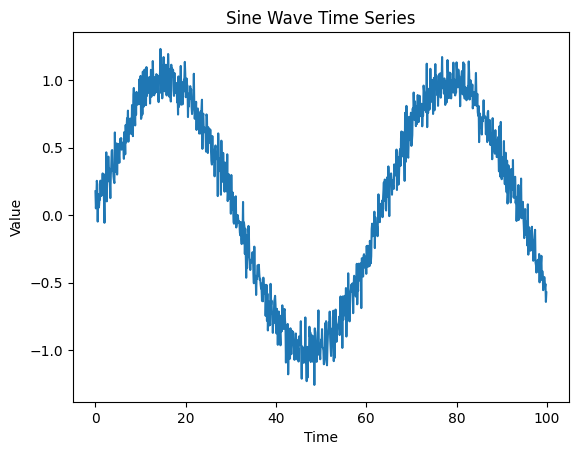

In [13]:
# Generate a sine wave time series

np.random.seed(0)

t = np.arange(0, 100, 0.1)

signal = np.sin(0.1 * t) + np.random.normal(0, 0.1, len(t))
# Plot the time series

plt.plot(t, signal)

plt.title('Sine Wave Time Series')

plt.xlabel('Time')

plt.ylabel('Value')

plt.show()

## Create sequential train/test set

In [14]:
# Split the data into training and testing sets

train_size = int(len(signal) * 0.8)

train_data = signal[:train_size]

test_data = signal[train_size:]

In [16]:
# Define the sequence length and step size

sequence_length = 10

step = 1
# Generate sequences for training

sequences = []

labels = []

for i in range(len(train_data) - sequence_length - 1):

        sequences.append(train_data[i:i+sequence_length])

        labels.append(train_data[i+sequence_length])



sequences = np.array(sequences)

labels = np.array(labels)



## Building a Sequential Model

In [17]:
# Build the sequential model

model = Sequential()

model.add(LSTM(64, input_shape=(sequence_length, 1)))

model.add(Dense(1))
# Compile the model

model.compile(loss='mean_squared_error', optimizer='adam')